In [ ]:
!pip install -U datasets huggingface_hub fsspec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12

In [ ]:
import pandas as pd
import string
from datasets import load_dataset

dataset = load_dataset("gretelai/symptom_to_diagnosis")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.46k [00:00<?, ?B/s]

train.jsonl:   0%|          | 0.00/171k [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/42.5k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/853 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/212 [00:00<?, ? examples/s]

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['output_text', 'input_text'],
        num_rows: 853
    })
    test: Dataset({
        features: ['output_text', 'input_text'],
        num_rows: 212
    })
})


In [ ]:
df_pd = dataset["train"].to_pandas()

In [ ]:
df_pd['output_text'].unique()

array(['cervical spondylosis', 'impetigo', 'urinary tract infection',
       'arthritis', 'dengue', 'common cold', 'drug reaction',
       'fungal infection', 'malaria', 'allergy', 'bronchial asthma',
       'varicose veins', 'migraine', 'hypertension',
       'gastroesophageal reflux disease', 'pneumonia', 'psoriasis',
       'diabetes', 'jaundice', 'chicken pox', 'typhoid',
       'peptic ulcer disease'], dtype=object)

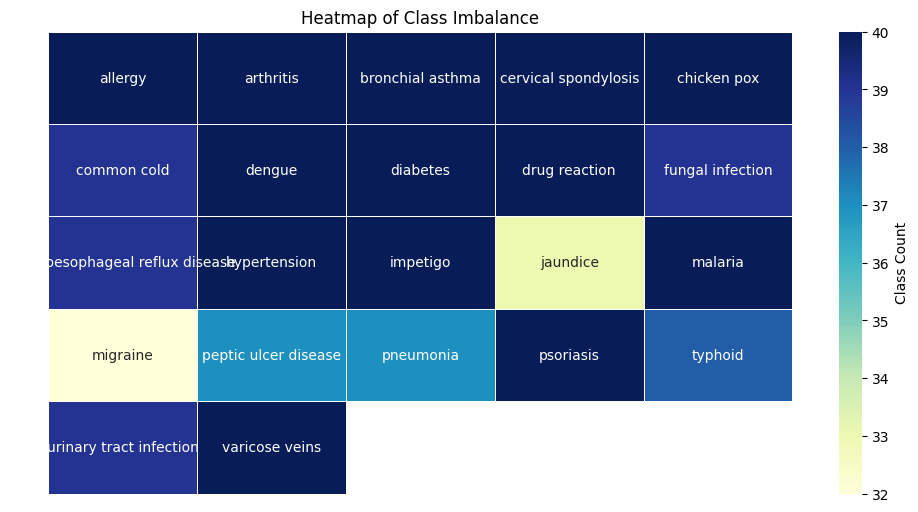

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Get value counts and sort alphabetically
value_counts = df_pd['output_text'].value_counts().sort_index()

# Convert to DataFrame for heatmap input
freq_df = pd.DataFrame({'Condition': value_counts.index, 'Count': value_counts.values})
grid_size = (5, 5)
data_matrix = np.full(grid_size, np.nan)  # fill with NaNs initially

# Fill with counts
flat_counts = value_counts.values
for i, count in enumerate(flat_counts):
    row, col = divmod(i, grid_size[1])
    data_matrix[row, col] = count

# Create labels grid
labels = np.full(grid_size, "", dtype=object)
for i, label in enumerate(value_counts.index):
    row, col = divmod(i, grid_size[1])
    labels[row, col] = label

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(data_matrix, annot=labels, fmt='', cmap="YlGnBu", linewidths=0.5, cbar_kws={'label': 'Class Count'})
plt.title('Heatmap of Class Imbalance')
plt.axis('off')
plt.show()

In [ ]:
df_train = dataset["train"].to_pandas()

In [ ]:
df_test = dataset["test"].to_pandas()

In [ ]:
df_train

,output_text,input_text
0,cervical spondylosis,I've been having a lot of pain in my neck and ...
1,impetigo,I have a rash on my face that is getting worse...
2,urinary tract infection,I have been urinating blood. I sometimes feel ...
3,arthritis,I have been having trouble with my muscles and...
4,dengue,I have been feeling really sick. My body hurts...
...,...,...
848,varicose veins,My veins are bulging and painful. I can't stan...
849,migraine,I have been having headaches for a while now. ...
850,impetigo,I have a rash on my face that is very painful ...
851,allergy,I have a stuffy nose and nasal congestion. I s...


In [ ]:
df = df_train.copy()

In [ ]:
df_sparse = df_train.copy()

write the functions for the punt removal, tokenization, lemmatization and stop-words removal

In [ ]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('punkt_tab')

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))
# Add the words that were ignored by the nltk by default
stop_words.update(["'ve", "ve", "’ve", "'s", "also", "'m", "ha", "ca"])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
def preprocess(text):
    text = text.lower()
    tokens = word_tokenize(text)

    clean_lemmas = []
    for token in tokens:
        if token in string.punctuation:
            continue

        lemma = lemmatizer.lemmatize(token)

        if lemma in stop_words:
            continue

        clean_lemmas.append(lemma)

    return clean_lemmas

In [ ]:
df["input_text"] = df["input_text"].str.lower()
df["cleaned"] = df["input_text"].apply(preprocess)

In [ ]:
all_words = df['cleaned'].explode().tolist()

In [ ]:
unique_words = set(all_words)
print(f"Number of unique words: {len(unique_words)}")

Number of unique words: 875


In [ ]:
df['word_count'] = df['cleaned'].apply(lambda x: len(str(x).split()))
#Summary of the amount of words in the input_text
print(df['word_count'].describe())

count    853.000000
mean      12.914420
std        3.640982
min        3.000000
25%       10.000000
50%       13.000000
75%       15.000000
max       26.000000
Name: word_count, dtype: float64


In [ ]:
#Ckeck for the any stopwords that were not removed
all_words

['lot',
 'pain',
 'neck',
 'back',
 'trouble',
 'balance',
 'coordination',
 'coughing',
 'lot',
 'limb',
 'feel',
 'weak',
 'rash',
 'face',
 'getting',
 'worse',
 'red',
 'inflamed',
 'blister',
 'bleeding',
 'clear',
 'pu',
 'really',
 'painful',
 'urinating',
 'blood',
 'sometimes',
 'feel',
 'sick',
 'stomach',
 'urinate',
 'often',
 'feel',
 'like',
 'fever',
 'trouble',
 'muscle',
 'joint',
 'neck',
 'really',
 'tight',
 'muscle',
 'feel',
 'weak',
 'swollen',
 'joint',
 'hard',
 'move',
 'around',
 'without',
 'becoming',
 'stiff',
 'really',
 'uncomfortable',
 'walk',
 'feeling',
 'really',
 'sick',
 'body',
 'hurt',
 'lot',
 'appetite',
 'developed',
 'rash',
 'arm',
 'face',
 'back',
 'eye',
 'hurt',
 'lot',
 'feeling',
 'really',
 'run',
 'weak',
 'throat',
 'sore',
 'coughing',
 'lot',
 'chill',
 'fever',
 'rash',
 'body',
 'high',
 'fever',
 'chill',
 'headache',
 'body',
 'ache',
 'pain',
 'behind',
 'eye',
 'feeling',
 'nauseous',
 'constant',
 'urge',
 'vomit',
 'accom

In [ ]:
from nltk import FreqDist
from wordcloud import WordCloud
fdist= FreqDist(all_words)

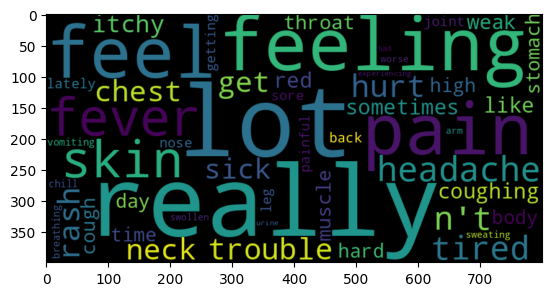

In [ ]:
#WordCloud illustration
wc= WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(fdist)
plt.imshow(wc, interpolation="bilinear")
plt.show()

<h1>verify the preprocessing</h1>

In [ ]:
df["cleaned"][1]

['rash',
 'face',
 'getting',
 'worse',
 'red',
 'inflamed',
 'blister',
 'bleeding',
 'clear',
 'pu',
 'really',
 'painful']

In [ ]:
df_train["input_text"][1]

'I have a rash on my face that is getting worse. It is red, inflamed, and has blisters that are bleeding clear pus. It is really painful.'

we will follow the sequence: punct removal -> **tokenize -> Lemma -> stop-words removal**

# PPMI

In [ ]:
df_train_split = dataset["train"].to_pandas()
df_test_split = dataset["test"].to_pandas()

df_train_split["input_text"] = df_train_split["input_text"].str.lower()
df_train_split["cleaned"] = df_train_split["input_text"].apply(preprocess)

df_test_split["input_text"] = df_test_split["input_text"].str.lower()
df_test_split["cleaned"] = df_test_split["input_text"].apply(preprocess)

In [ ]:
from collections import defaultdict
from tqdm import tqdm


token_lists = df_train_split["cleaned"].tolist()

window_size = 4
word_freq = defaultdict(int)
context_freq = defaultdict(int)
word_context_counting = defaultdict(lambda: defaultdict(int))

for tokens in tqdm(token_lists):
    for i, token in enumerate(tokens):
        word_freq[token] += 1
        context_range = tokens[max(i - window_size, 0): i] + tokens[i + 1: i + 1 + window_size]
        for context_token in context_range:
            if context_token != token:
                context_freq[context_token] += 1
                word_context_counting[token][context_token] += 1


word2id = {word: idx for idx, word in enumerate(word_freq)}
context2id = {word: idx for idx, word in enumerate(context_freq)}


matrix = np.zeros((len(word2id), len(context2id)), dtype=np.float32)
for word, contexts in word_context_counting.items():
    for context, count in contexts.items():
        matrix[word2id[word], context2id[context]] = count


df_counts = pd.DataFrame(data=matrix, index=word2id.keys(), columns=context2id.keys())

# Compute PPMI
def pmi(df, positive=True, laplace=1):
    df += laplace
    col_totals = df.sum(axis=0)
    total = col_totals.sum()
    row_totals = df.sum(axis=1)
    expected = np.outer(row_totals, col_totals) / total
    df = df / expected
    with np.errstate(divide='ignore'):
        df = np.log(df)
    df[np.isinf(df)] = 0.0
    df[np.isnan(df)] = 0.0
    if positive:
        df[df < 0] = 0.0
    return df

ppmi_matrix = pmi(df_counts, positive=True, laplace=1)
ppmi_matrix.head()


print(f"PPMI Matrix shape: {ppmi_matrix.shape}")
print(ppmi_matrix.iloc[:10, :10])

100%|██████████| 853/853 [00:00<00:00, 9006.77it/s]

PPMI Matrix shape: (875, 875)
                  pain      neck      back   trouble       lot   balance  \
lot           2.037131  1.201595  1.364356  1.909090  0.000000  0.000000   
pain          0.000000  1.962823  2.647105  1.826597  2.037131  1.295025   
neck          1.962823  0.000000  1.763629  1.786487  1.201595  1.804961   
back          2.647105  1.763629  0.000000  0.000000  1.364356  0.281323   
trouble       1.826597  1.786487  0.000000  0.000000  1.909090  1.924669   
balance       1.295025  1.804961  0.281323  1.924669  0.000000  0.000000   
coordination  0.000000  0.156454  0.424575  0.196119  0.000000  0.620058   
coughing      0.160115  0.000000  0.938173  1.808329  2.802416  0.035044   
limb          1.158982  0.793450  1.061571  0.139968  0.000000  1.480198   
feel          1.629767  1.264235  0.896367  1.466419  2.070893  0.280920   

              coordination  coughing      limb      feel  
lot               0.000000  2.802416  0.000000  2.070893  
pain           

In [ ]:
#Get the embedding with the PPMI
def get_document_embedding(tokens, ppmi_matrix):
    valid_tokens = [t for t in tokens if t in ppmi_matrix.index]
    if not valid_tokens:
        return np.zeros(ppmi_matrix.shape[1])
    vectors = ppmi_matrix.loc[valid_tokens].values
    return vectors.mean(axis=0)

In [ ]:
df_train_split["embedding"] = df_train_split["cleaned"].apply(lambda tokens: get_document_embedding(tokens, ppmi_matrix))
df_test_split["embedding"] = df_test_split["cleaned"].apply(lambda tokens: get_document_embedding(tokens, ppmi_matrix))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X_train = np.stack(df_train_split["embedding"].values)
y_train = df_train_split["output_text"]

X_test = np.stack(df_test_split["embedding"].values)
y_test = df_test_split["output_text"]

clf = LogisticRegression(max_iter=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                                 precision    recall  f1-score   support

                        allergy       0.77      1.00      0.87        10
                      arthritis       1.00      1.00      1.00        10
               bronchial asthma       1.00      1.00      1.00        10
           cervical spondylosis       1.00      1.00      1.00        10
                    chicken pox       1.00      0.50      0.67        10
                    common cold       1.00      0.80      0.89        10
                         dengue       0.80      0.80      0.80        10
                       diabetes       0.88      0.70      0.78        10
                  drug reaction       0.67      0.75      0.71         8
               fungal infection       1.00      1.00      1.00         9
gastroesophageal reflux disease       0.89      0.80      0.84        10
                   hypertension       0.90      0.90      0.90        10
                       impetigo       1.00      1.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from matplotlib.lines import Line2D
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

def reduce_and_plot_ppmi(X, labels, method="tsne", title = str):
    if method == "tsne":
        reducer = TSNE(n_components=2, random_state=42, perplexity=30)
    else:
        raise ValueError("Method must be 'tsne'")

    X_reduced = reducer.fit_transform(X)

    df_plot = pd.DataFrame({
        "Component 1": X_reduced[:, 0],
        "Component 2": X_reduced[:, 1],
        "label": labels
    })

    plt.figure(figsize=(12, 8))

    square_classes = {"urinary tract infection", "varicose veins"}  # optional: visually highlight

    unique_labels = sorted(df_plot["label"].unique())
    palette = sns.color_palette("tab20", len(unique_labels))
    label_to_color = dict(zip(unique_labels, palette))

    for label in unique_labels:
        subset = df_plot[df_plot["label"] == label]
        marker_style = 's' if label in square_classes else 'o'
        plt.scatter(
            subset["Component 1"],
            subset["Component 2"],
            c=[label_to_color[label]],
            label=label,
            marker=marker_style,
            edgecolors='w',
            s=60,
            alpha=0.9
        )

    handles = [
        Line2D([0], [0],
               marker='s' if label in square_classes else 'o',
               color='w',
               markerfacecolor=label_to_color[label],
               markeredgecolor='w',
               markersize=8,
               label=label)
        for label in unique_labels
    ]

    plt.legend(
        handles=handles,
        title='Diagnosis',
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        borderaxespad=0.,
        fontsize='small',
        title_fontsize='medium'
    )

    plt.title(title)
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

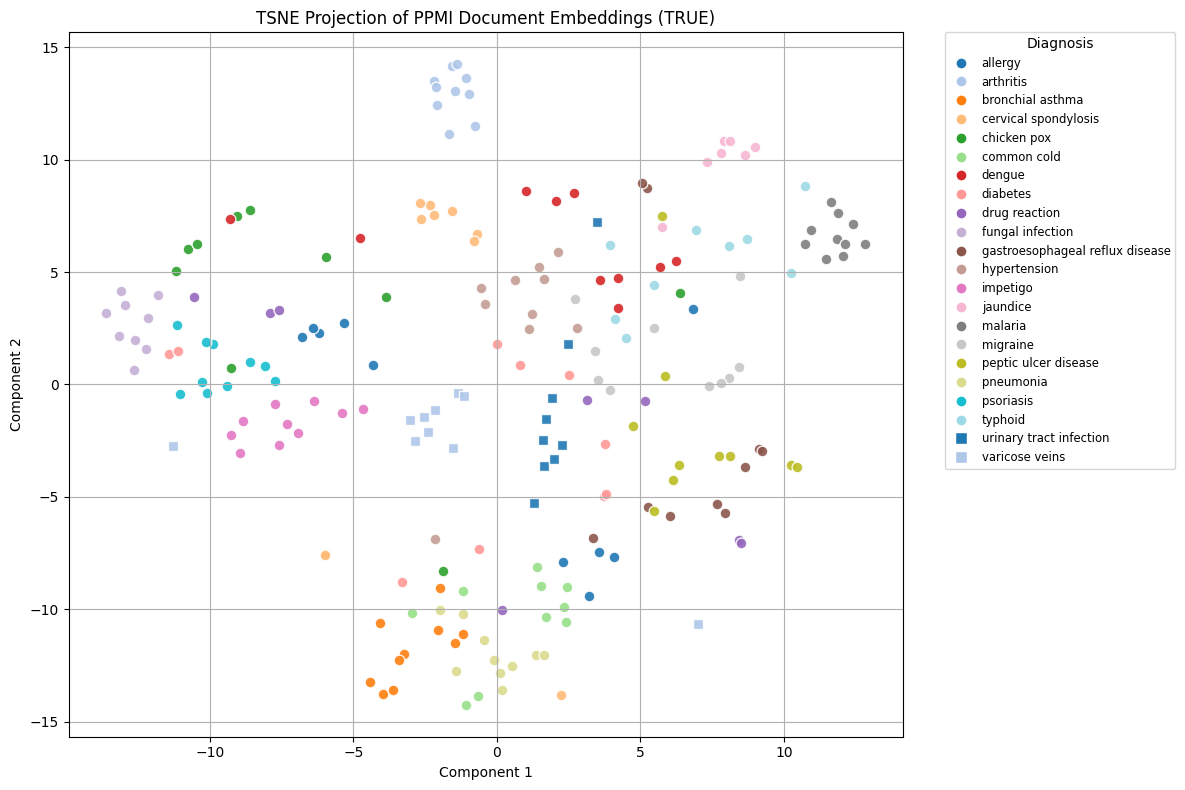

In [ ]:
reduce_and_plot_ppmi(X_test, y_test, method="tsne", title = "TSNE Projection of PPMI Document Embeddings (TRUE)")

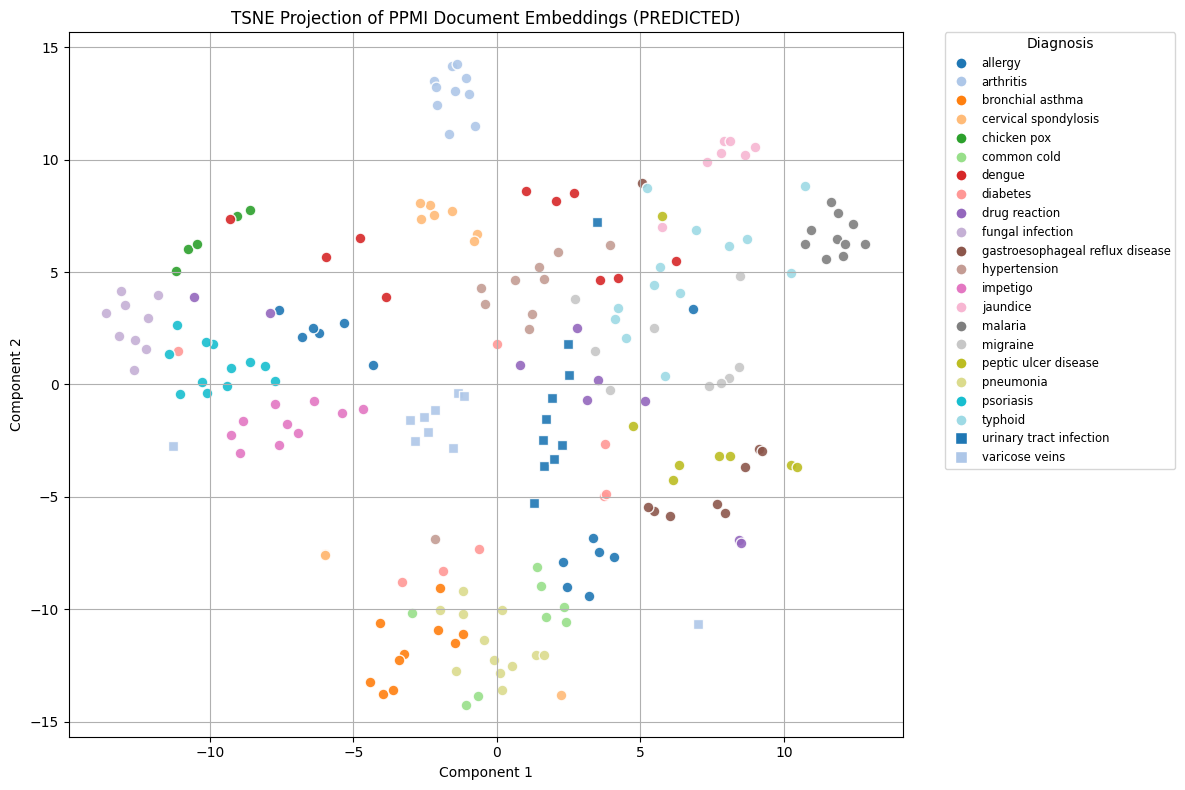

In [ ]:
reduce_and_plot_ppmi(X_test, y_pred, method="tsne", title = "TSNE Projection of PPMI Document Embeddings (PREDICTED)")

# GLOVE

In [ ]:
from google.colab import drive
import os
from pathlib import Path

#Mount Drive to skip downloading the glove every time
drive.mount('/content/drive')

glove_dir = "/content/drive/MyDrive/glove"
glove_txt_file = "glove.6B.100d.txt"
glove_zip_file = "glove.6B.zip"

glove_txt_path = Path(glove_dir) / glove_txt_file
glove_zip_path = Path(glove_dir) / glove_zip_file

os.makedirs(glove_dir, exist_ok=True)

if not glove_txt_path.exists():
    print("Downloading GloVe embeddings...")

    !wget -O "$glove_zip_path" https://nlp.stanford.edu/data/glove.6B.zip

    !unzip -q "$glove_zip_path" "$glove_txt_file" -d "$glove_dir"
    print("✓ GloVe downloaded and extracted.")
else:
    print("✓ GloVe already exists in Google Drive.")

GLOVE_PATH = glove_txt_path
print(f"GloVe path: {GLOVE_PATH}")

Mounted at /content/drive
✓ GloVe already exists in Google Drive.
GloVe path: /content/drive/MyDrive/glove/glove.6B.100d.txt


In [ ]:
df_train_glove = dataset["train"].to_pandas()
df_test_glove = dataset["test"].to_pandas()

# Lowercase the text columns
df_train_glove["input_text"] = df_train_glove["input_text"].str.lower()
df_test_glove["input_text"] = df_test_glove["input_text"].str.lower()

# Apply the same preprocessing function you used for PPMI
df_train_glove["cleaned"] = df_train_glove["input_text"].apply(preprocess)
df_test_glove["cleaned"] = df_test_glove["input_text"].apply(preprocess)

In [ ]:
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

GLOVE_PATH = Path("/content/drive/MyDrive/glove/glove.6B.100d.txt")
EMBED_DIM  = 100

#load glove in the dictionary to use it
print("Loading GloVe vectors…")
glove_index: dict[str, np.ndarray] = {}
with GLOVE_PATH.open(encoding="utf8") as fh:
    for line in fh:
        parts = line.rstrip().split()
        if len(parts) != EMBED_DIM + 1:
            continue
        word, *vec = parts
        glove_index[word] = np.asarray(vec, dtype="float32")
print(f"✓ Loaded {len(glove_index):,} word vectors ({EMBED_DIM}-dim)")

def doc_to_avg_vector(tokens: list[str],
                      lookup: dict[str, np.ndarray],
                      dim: int = EMBED_DIM) -> np.ndarray:
    if not tokens:
        return np.zeros(dim, dtype="float32")

    vectors = [lookup.get(tok, np.zeros(dim, dtype="float32")) for tok in tokens]
    return np.mean(vectors, axis=0)

#vectorize all the corpus
X_train_glove = np.vstack(df_train_glove["cleaned"].apply(lambda toks: doc_to_avg_vector(toks, glove_index)))
y_train_glove = df_train_glove["output_text"].values

X_test_glove = np.vstack(df_test_glove["cleaned"].apply(lambda toks: doc_to_avg_vector(toks, glove_index)))
y_test_glove = df_test_glove["output_text"].values

print(f"Feature matrix shape: {X_train_glove.shape}  |  Labels shape: {y_train_glove.shape}")


#Logistic Regression model for prediciton
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_glove, y_train_glove)

y_pred_glove = clf.predict(X_test_glove)
print("\n────────────────  RESULTS  ────────────────")
print("Accuracy:", accuracy_score(y_test_glove, y_pred_glove))
print(classification_report(y_test_glove, y_pred_glove, digits=4))

Loading GloVe vectors…
✓ Loaded 400,000 word vectors (100-dim)
Feature matrix shape: (853, 100)  |  Labels shape: (853,)

────────────────  RESULTS  ────────────────
Accuracy: 0.8537735849056604
                                 precision    recall  f1-score   support

                        allergy     0.8000    0.8000    0.8000        10
                      arthritis     1.0000    1.0000    1.0000        10
               bronchial asthma     0.8333    1.0000    0.9091        10
           cervical spondylosis     0.9091    1.0000    0.9524        10
                    chicken pox     1.0000    0.7000    0.8235        10
                    common cold     0.7692    1.0000    0.8696        10
                         dengue     0.7000    0.7000    0.7000        10
                       diabetes     0.7778    0.7000    0.7368        10
                  drug reaction     0.8333    0.6250    0.7143         8
               fungal infection     1.0000    0.7778    0.8750         9
g

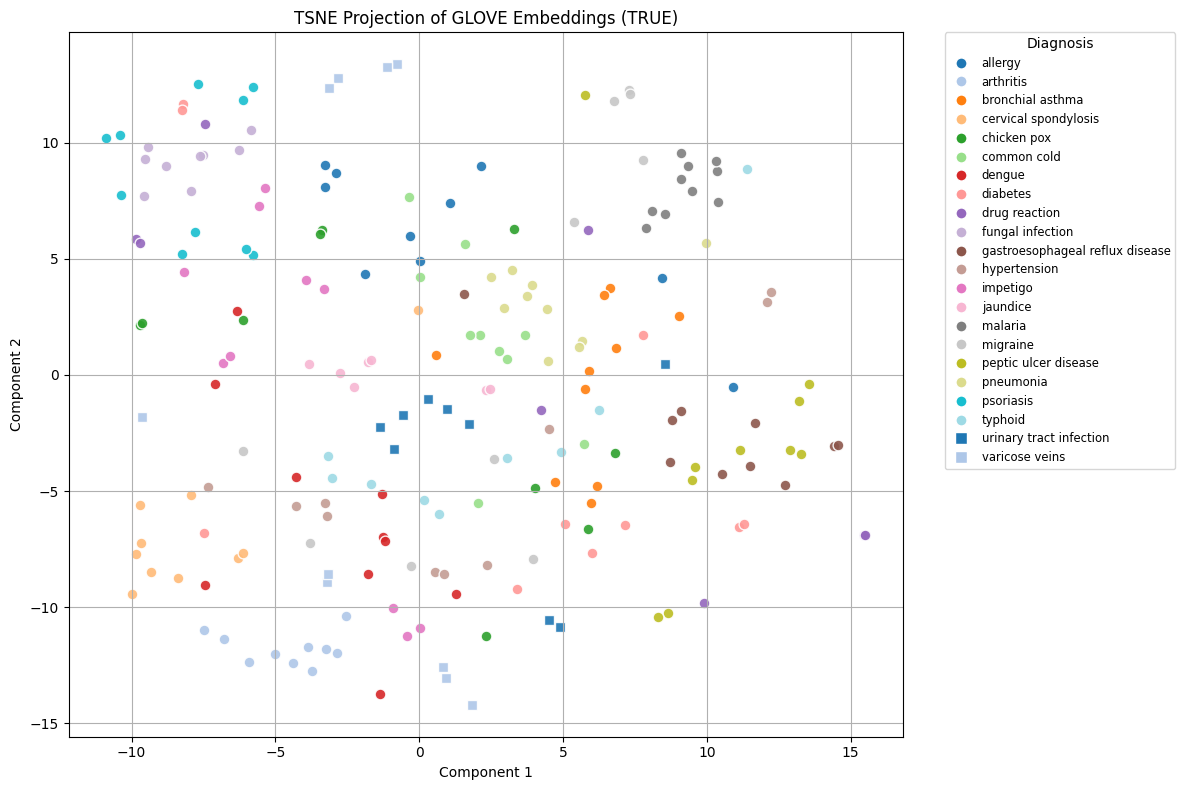

In [ ]:
reduce_and_plot_ppmi(X_test_glove, y_test_glove, method="tsne", title = "TSNE Projection of GLOVE Embeddings (TRUE)")

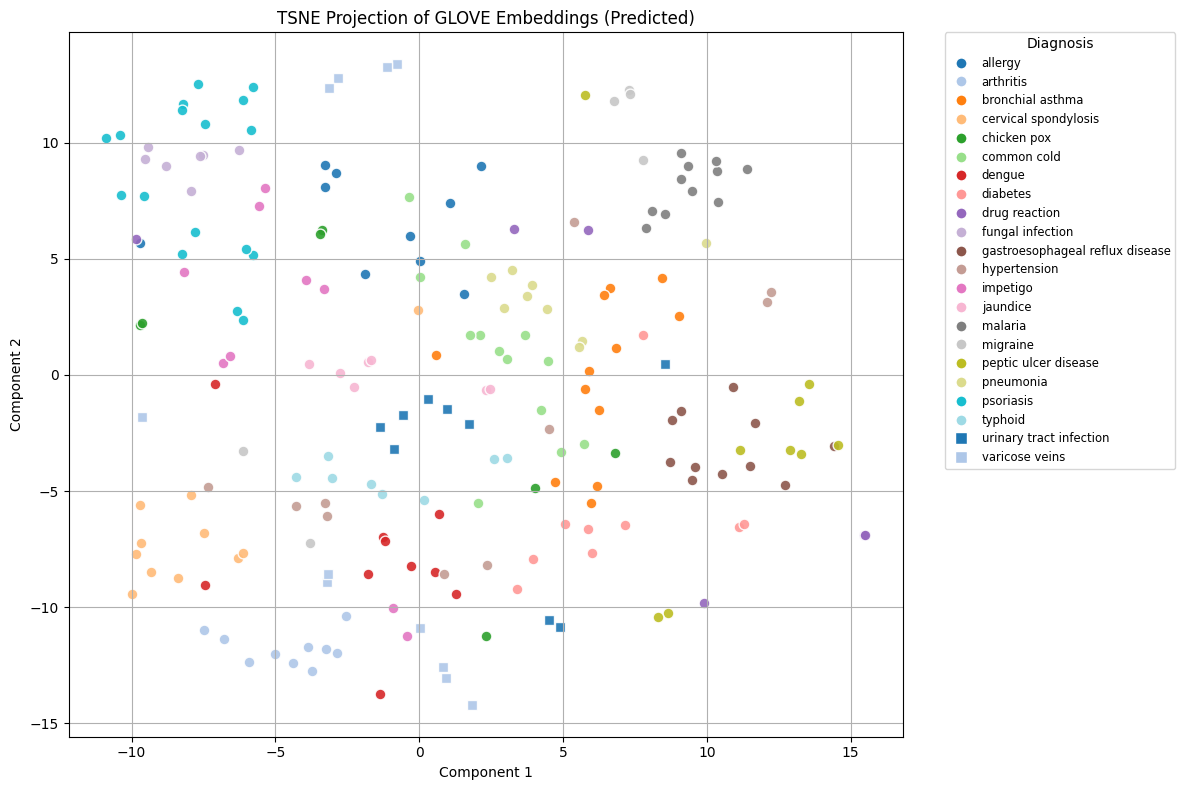

In [ ]:
reduce_and_plot_ppmi(X_test_glove, y_pred_glove, method="tsne", title = "TSNE Projection of GLOVE Embeddings (Predicted)")

In [ ]:
from sklearn import ensemble
clf_rf = ensemble.RandomForestClassifier(
    n_estimators=200,    # number of trees
    max_depth=None,
    random_state=42
)
clf_rf.fit(X_train_glove, y_train_glove)

y_pred = clf.predict(X_test_glove)
print("\n────────────────  RESULTS  ────────────────")
print("Accuracy:", accuracy_score(y_test_glove, y_pred))
print(classification_report(y_test_glove, y_pred, digits=4))


────────────────  RESULTS  ────────────────
Accuracy: 0.8537735849056604
                                 precision    recall  f1-score   support

                        allergy     0.8000    0.8000    0.8000        10
                      arthritis     1.0000    1.0000    1.0000        10
               bronchial asthma     0.8333    1.0000    0.9091        10
           cervical spondylosis     0.9091    1.0000    0.9524        10
                    chicken pox     1.0000    0.7000    0.8235        10
                    common cold     0.7692    1.0000    0.8696        10
                         dengue     0.7000    0.7000    0.7000        10
                       diabetes     0.7778    0.7000    0.7368        10
                  drug reaction     0.8333    0.6250    0.7143         8
               fungal infection     1.0000    0.7778    0.8750         9
gastroesophageal reflux disease     0.7273    0.8000    0.7619        10
                   hypertension     0.9000    0.9

<h1>BERT and clinical BERT</h1>

In [ ]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=22)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from datasets import load_dataset
ds = load_dataset("gretelai/symptom_to_diagnosis")

In [ ]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['output_text', 'input_text'],
        num_rows: 853
    })
    test: Dataset({
        features: ['output_text', 'input_text'],
        num_rows: 212
    })
})


In [ ]:
# Get unique labels and build label mapping
labels = sorted(set(ds["train"]["output_text"]))
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for label, i in label2id.items()}
print(label2id)

{'allergy': 0, 'arthritis': 1, 'bronchial asthma': 2, 'cervical spondylosis': 3, 'chicken pox': 4, 'common cold': 5, 'dengue': 6, 'diabetes': 7, 'drug reaction': 8, 'fungal infection': 9, 'gastroesophageal reflux disease': 10, 'hypertension': 11, 'impetigo': 12, 'jaundice': 13, 'malaria': 14, 'migraine': 15, 'peptic ulcer disease': 16, 'pneumonia': 17, 'psoriasis': 18, 'typhoid': 19, 'urinary tract infection': 20, 'varicose veins': 21}


In [ ]:
def encode_labels(example):
    example["label"] = label2id[example["output_text"]]
    return example

ds = ds.map(encode_labels)

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(example):
    return tokenizer(
        example["input_text"],
        truncation=True,
        padding="max_length",
        max_length=128
    )

tokenized_ds = ds.map(tokenize_function, batched=True)

In [ ]:
tokenized_ds = tokenized_ds.remove_columns(["input_text", "output_text"])
tokenized_ds.set_format("torch")

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./bert_symptom_model",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=8e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to=None
)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)
    return {
        "accuracy": accuracy_score(labels, predictions),
        "f1": f1_score(labels, predictions, average="weighted")
    }

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
from transformers import Trainer
from transformers import EarlyStoppingCallback

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_ds["train"],
    eval_dataset=tokenized_ds["test"],
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
)
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.664886,0.754717,0.721199
2,No log,0.564829,0.882075,0.879406
3,No log,0.309780,0.938679,0.938612
4,No log,0.219170,0.943396,0.942602
5,No log,0.160614,0.962264,0.961719
6,No log,0.147207,0.971698,0.971139
7,No log,0.144231,0.971698,0.971611
8,No log,0.136347,0.971698,0.971611


TrainOutput(global_step=432, training_loss=0.5321323606703017, metrics={'train_runtime': 230.9172, 'train_samples_per_second': 36.94, 'train_steps_per_second': 2.339, 'total_flos': 448948064440320.0, 'train_loss': 0.5321323606703017, 'epoch': 8.0})

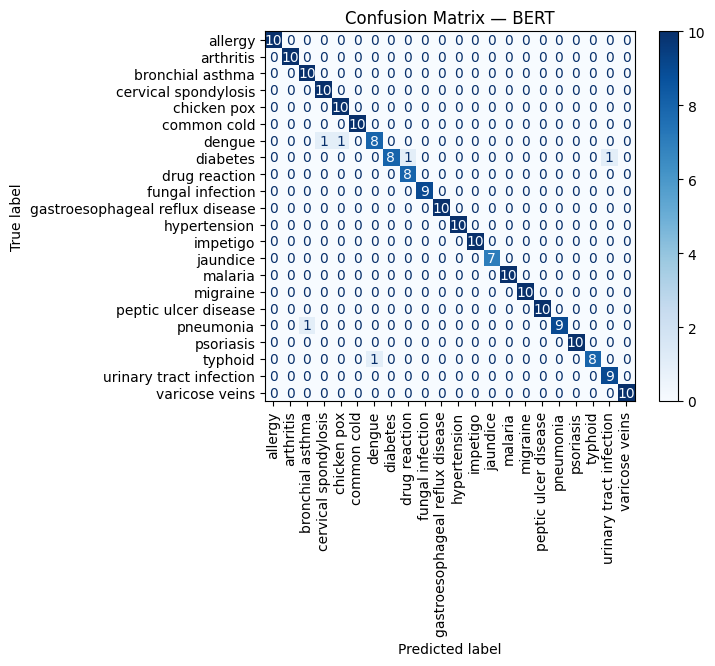

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

y_true = tokenized_ds["test"]["label"]
y_pred = trainer.predict(tokenized_ds["test"]).predictions.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred, labels=list(id2label.keys()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(id2label.values()))
disp.plot(xticks_rotation=90, cmap="Blues")
plt.title("Confusion Matrix — BERT")
plt.grid(False)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=list(id2label.values())))

                                 precision    recall  f1-score   support

                        allergy       1.00      1.00      1.00        10
                      arthritis       1.00      1.00      1.00        10
               bronchial asthma       0.91      1.00      0.95        10
           cervical spondylosis       0.91      1.00      0.95        10
                    chicken pox       0.91      1.00      0.95        10
                    common cold       1.00      1.00      1.00        10
                         dengue       0.89      0.80      0.84        10
                       diabetes       1.00      0.80      0.89        10
                  drug reaction       0.89      1.00      0.94         8
               fungal infection       1.00      1.00      1.00         9
gastroesophageal reflux disease       1.00      1.00      1.00        10
                   hypertension       1.00      1.00      1.00        10
                       impetigo       1.00      1.

In [ ]:


from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    EarlyStoppingCallback,
)

clinical_model_name = "emilyalsentzer/Bio_ClinicalBERT"

In [ ]:
clinical_tokenizer = AutoTokenizer.from_pretrained(clinical_model_name)
clinical_model = AutoModelForSequenceClassification.from_pretrained(
    clinical_model_name,
    num_labels=len(label2id),
    label2id=label2id,
    id2label=id2label,
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def tokenize_clinical(example):
    return clinical_tokenizer(
        example["input_text"],
        truncation=True,
        padding="max_length",
        max_length=128,
    )

In [ ]:
clinical_tokenized_ds = ds.map(tokenize_clinical, batched=True)
clinical_tokenized_ds = clinical_tokenized_ds.remove_columns(["input_text", "output_text"])
clinical_tokenized_ds.set_format("torch")

Map:   0%|          | 0/212 [00:00<?, ? examples/s]

In [ ]:
clinical_training_args = TrainingArguments(
    output_dir="./clinical_bert_symptom_model",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=8e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
clinical_trainer = Trainer(
    model=clinical_model,
    args=clinical_training_args,
    train_dataset=clinical_tokenized_ds["train"],
    eval_dataset=clinical_tokenized_ds["test"],
    compute_metrics=compute_metrics,          # ← reuse the function you already defined
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
)

In [ ]:
clinical_trainer.train()
clinical_metrics = clinical_trainer.evaluate()
print("\nClinicalBERT test-set metrics:", clinical_metrics)


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,1.671480,0.669811,0.613738
2,No log,0.677217,0.858491,0.854343
3,No log,0.304330,0.924528,0.922249
4,No log,0.201445,0.948113,0.946844
5,No log,0.172335,0.933962,0.933082
6,No log,0.128504,0.976415,0.976077
7,No log,0.145681,0.962264,0.962260
8,No log,0.128117,0.971698,0.971360



ClinicalBERT test-set metrics: {'eval_loss': 0.12850406765937805, 'eval_accuracy': 0.9764150943396226, 'eval_f1': 0.9760773558016387, 'eval_runtime': 2.607, 'eval_samples_per_second': 81.319, 'eval_steps_per_second': 2.685, 'epoch': 8.0}


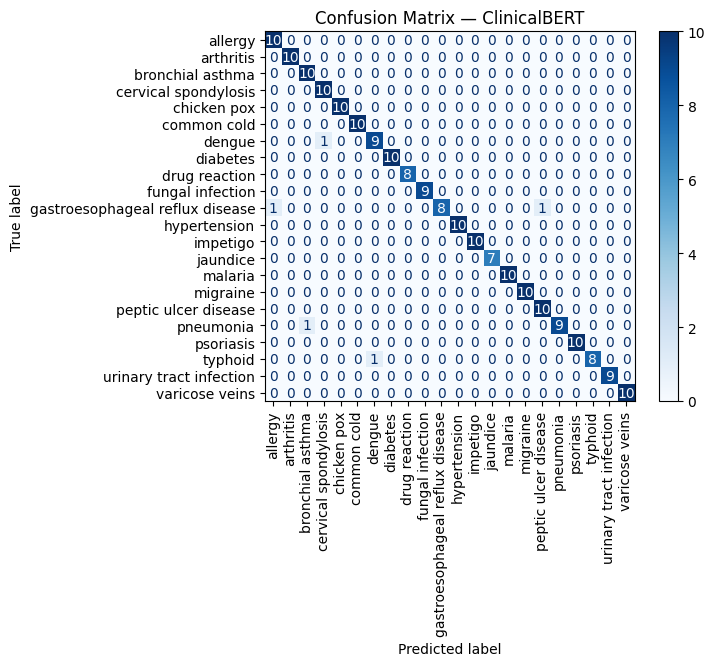

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

y_true = clinical_tokenized_ds["test"]["label"]
y_pred = clinical_trainer.predict(clinical_tokenized_ds["test"]).predictions.argmax(axis=1)

cm = confusion_matrix(y_true, y_pred, labels=list(id2label.keys()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(id2label.values()))
disp.plot(xticks_rotation=90, cmap="Blues")
plt.title("Confusion Matrix — ClinicalBERT")
plt.grid(False)
plt.show()


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=list(id2label.values())))

                                 precision    recall  f1-score   support

                        allergy       0.91      1.00      0.95        10
                      arthritis       1.00      1.00      1.00        10
               bronchial asthma       0.91      1.00      0.95        10
           cervical spondylosis       0.91      1.00      0.95        10
                    chicken pox       1.00      1.00      1.00        10
                    common cold       1.00      1.00      1.00        10
                         dengue       0.90      0.90      0.90        10
                       diabetes       1.00      1.00      1.00        10
                  drug reaction       1.00      1.00      1.00         8
               fungal infection       1.00      1.00      1.00         9
gastroesophageal reflux disease       1.00      0.80      0.89        10
                   hypertension       1.00      1.00      1.00        10
                       impetigo       1.00      1.

In [ ]:
trainer.train()

<h1>LLM prompting<h1>
<b>deepseek api</b>


In [ ]:
!pip install requests

In [ ]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['output_text', 'input_text', 'label'],
        num_rows: 853
    })
    test: Dataset({
        features: ['output_text', 'input_text', 'label'],
        num_rows: 212
    })
})


In [ ]:
import os
import time
import requests
from tqdm import tqdm
from datasets import load_dataset, DatasetDict

# Load your dataset
dataset = load_dataset("gretelai/symptom_to_diagnosis")  # Replace with your actual path or HF dataset name

# Clean text helpers
def clean_text(text):
    if isinstance(text, str):
        return text.replace('-', '').encode("utf-8", "ignore").decode("utf-8")
    return text

# Configure DeepSeek API
API_KEY = os.getenv("DEEPSEEK_API_KEY", "API-KEY")  # Replace with your real key
API_URL = "https://api.deepseek.com/v1/chat/completions"
HEADERS = {
    "Authorization": f"Bearer {API_KEY}",
    "Content-Type": "application/json; charset=utf-8"
}

SYSTEM_PROMPT = (
    "You are a doctor, which chooses the diagnosis as one of the following, and output ONLY the diagnosis: "
    "cervical spondylosis, impetigo, urinary tract infection, arthritis, dengue, "
    "common cold, drug reaction, fungal infection, malaria, allergy, bronchial asthma, "
    "varicose veins, migraine, hypertension, gastroesophageal reflux disease, pneumonia, "
    "psoriasis, diabetes, jaundice, chicken pox, typhoid, peptic ulcer disease."
)

def classify_case(text: str, retry: int = 3) -> str:
    """Send the user text to Deepseek and return the predicted diagnosis."""
    payload = {
        "model": "deepseek-chat",
        "temperature": 0.7,
        "messages": [
            {"role": "system", "content": SYSTEM_PROMPT},
            {"role": "user", "content": text}
        ]
    }

    for attempt in range(retry):
        try:
            response = requests.post(API_URL, headers=HEADERS, json=payload, timeout=30)
            if response.status_code == 200:
                return response.json()["choices"][0]["message"]["content"].strip()
            else:
                print(f"Error {response.status_code}: {response.text}")
                time.sleep(2 ** attempt)
        except Exception as e:
            print(f"Exception during API call: {e}")
            time.sleep(2 ** attempt)

    return "ERROR"

# Apply to each dataset split
def annotate_dataset(ds_split):
    diagnoses = []
    for entry in tqdm(ds_split, desc="Classifying cases"):
        cleaned_text = clean_text(entry["input_text"])
        diagnosis = classify_case(cleaned_text)
        diagnoses.append(diagnosis)
    return ds_split.add_column("diagnosis", diagnoses)

# Annotate both train and test
dataset["train"] = annotate_dataset(dataset["train"])
dataset["test"] = annotate_dataset(dataset["test"])



Classifying cases:  32%|███████████████████▋                                         | 276/853 [15:34<29:47,  3.10s/it]

Exception during API call: HTTPSConnectionPool(host='api.deepseek.com', port=443): Read timed out.


Classifying cases: 100%|█████████████████████████████████████████████████████████████| 212/212 [14:15<00:00,  4.03s/it]


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

def evaluate_predictions(ds_split, label_col="output_text", pred_col="diagnosis"):
    # Extract ground truth and predictions
    y_true = [label.strip().lower() for label in ds_split[label_col]]
    y_pred = [pred.strip().lower() for pred in ds_split[pred_col]]

    # Compute basic metrics
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='macro')

    print("\nEvaluation Results on Test Set")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score (macro): {f1:.4f}")
    return acc, f1

# Run evaluation on test set
evaluate_predictions(dataset["test"])



Evaluation Results on Test Set
Accuracy: 0.6651
F1 Score (macro): 0.5160


(0.6650943396226415, 0.5160100980806286)

In [ ]:
print(dataset["train"]["diagnosis"])

['cervical spondylosis', 'impetigo', 'urinary tract infection', 'arthritis', 'dengue', 'common cold', 'dengue', 'typhoid', 'impetigo', 'psoriasis', 'arthritis', 'cervical spondylosis', 'cervical spondylosis', 'urinary tract infection', 'fungal infection', 'malaria', 'gastroesophageal reflux disease', 'bronchial asthma', 'varicose veins', 'common cold', 'chicken pox', 'migraine', 'drug reaction', 'hypertension', 'pneumonia', 'urinary tract infection', 'varicose veins', 'gastroesophageal reflux disease', 'malaria', 'urinary tract infection', 'impetigo', 'pneumonia', 'psoriasis', 'hypertension', 'impetigo', 'common cold', 'pneumonia', 'arthritis', 'diabetes', 'pneumonia', 'malaria', 'Based on the symptoms described (headaches, blurred and distorted vision, excessive hunger, stiff neck, depression, irritability, and visual disturbance), the most likely diagnosis is:\n\n**migraine**  \n\n(Note: While some symptoms like excessive hunger and irritability could also suggest **diabetes** or **h

<h1>LLM lecture approach</h1>

In [ ]:
!pip -q install -U "transformers>=4.41" datasets evaluate accelerate

In [ ]:
from datasets import load_dataset, DatasetDict
from transformers import (AutoTokenizer, AutoModelForSeq2SeqLM,
                          TrainingArguments, Trainer, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer, EarlyStoppingCallback)
import torch, random, numpy as np, os, evaluate, tqdm

os.environ["WANDB_DISABLED"] = "true"

In [ ]:
dataset = load_dataset("gretelai/symptom_to_diagnosis")

In [ ]:
POSSIBLE_DIAGNOSES = sorted(set(dataset["train"]["output_text"]))
print(f"✅ Found {len(POSSIBLE_DIAGNOSES)} unique labels")


✅ Found 22 unique labels


In [ ]:
PROMPT_TMPL = """You are a medical diagnosis assistant.
Given the following symptoms:
{sym}
Choose the correct diagnosis from this list:
{choices}
Answer:"""

def build_prompt(example):
    choices = ", ".join(POSSIBLE_DIAGNOSES)
    prompt = PROMPT_TMPL.format(sym=example["input_text"].strip(), choices=choices)
    full = prompt + " " + example["output_text"].strip()
    example["prompt"] = prompt
    example["text"] = full
    return example

In [ ]:
base_model = "google/flan-t5-small"

tokenizer = AutoTokenizer.from_pretrained(base_model)
model = AutoModelForSeq2SeqLM.from_pretrained(base_model)

# %% Tokenisation
max_length = 512

def tok_func(example):
    choices = ", ".join(POSSIBLE_DIAGNOSES)
    prompt = PROMPT_TMPL.format(sym=example["input_text"].strip(), choices=choices)
    inputs = tokenizer(prompt, padding="max_length", truncation=True, max_length=max_length)
    targets = tokenizer(example["output_text"], padding="max_length", truncation=True, max_length=16)
    inputs["labels"] = targets["input_ids"]
    inputs["prompt"] = prompt
    inputs["output_text"] = example["output_text"]
    return inputs


In [ ]:
dataset = dataset.map(tok_func, desc="Tokenising")

Tokenising:   0%|          | 0/212 [00:00<?, ? examples/s]

In [ ]:
splits = dataset["train"].train_test_split(test_size=0.1, seed=42)
train_ds, val_ds = splits["train"], splits["test"]
test_ds = dataset["test"]

In [ ]:
seed = 42
random.seed(seed); np.random.seed(seed); torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)

batch_size = 8

training_args = Seq2SeqTrainingArguments(
    output_dir="flan-t5-diagnosis",
    eval_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=8,
    learning_rate=3e-4,
    weight_decay=0.01,
    load_best_model_at_end=True,
    save_total_limit=2,
    push_to_hub=False,
    predict_with_generate=True,
    generation_max_length=16,
)

data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [ ]:
import evaluate
from sklearn.metrics import accuracy_score, f1_score


accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred

    # Convert token IDs to strings
    preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Remove spaces
    preds = [p.strip() for p in preds]
    labels = [l.strip() for l in labels]

    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds, average="macro", zero_division=0)
    }

In [ ]:
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
)

C:\Users\ARSENIY_\AppData\Local\Temp\ipykernel_11860\168229604.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(


In [ ]:
trainer.train()

Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.162081,0.348837,0.218360
2,No log,0.064823,0.627907,0.520929
3,No log,0.030483,0.813953,0.802928
4,No log,0.030983,0.837209,0.829526
5,No log,0.017722,0.918605,0.913708
6,0.744500,0.017353,0.895349,0.883314
7,0.744500,0.011911,0.941860,0.934324
8,0.744500,0.012216,0.941860,0.930827


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight'].


TrainOutput(global_step=768, training_loss=0.4888766674945752, metrics={'train_runtime': 417.7327, 'train_samples_per_second': 14.689, 'train_steps_per_second': 1.838, 'total_flos': 1140624136863744.0, 'train_loss': 0.4888766674945752, 'epoch': 8.0})

In [ ]:
def predict_diagnosis(text):
    choices = ", ".join(POSSIBLE_DIAGNOSES)
    prompt = PROMPT_TMPL.format(sym=text.strip(), choices=choices)
    input_ids = tokenizer(prompt, return_tensors="pt", truncation=True, max_length=max_length).input_ids.to(model.device)
    output = model.generate(input_ids, max_new_tokens=16)
    return tokenizer.decode(output[0], skip_special_tokens=True).strip()

In [ ]:
example = "I have a rash all over my body. It's really itchy andn"
print("\nExample →", predict_diagnosis(example))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(preds, labels):
    cm = confusion_matrix(labels, preds, labels=sorted(set(labels)))
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=sorted(set(labels)), yticklabels=sorted(set(labels)))
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

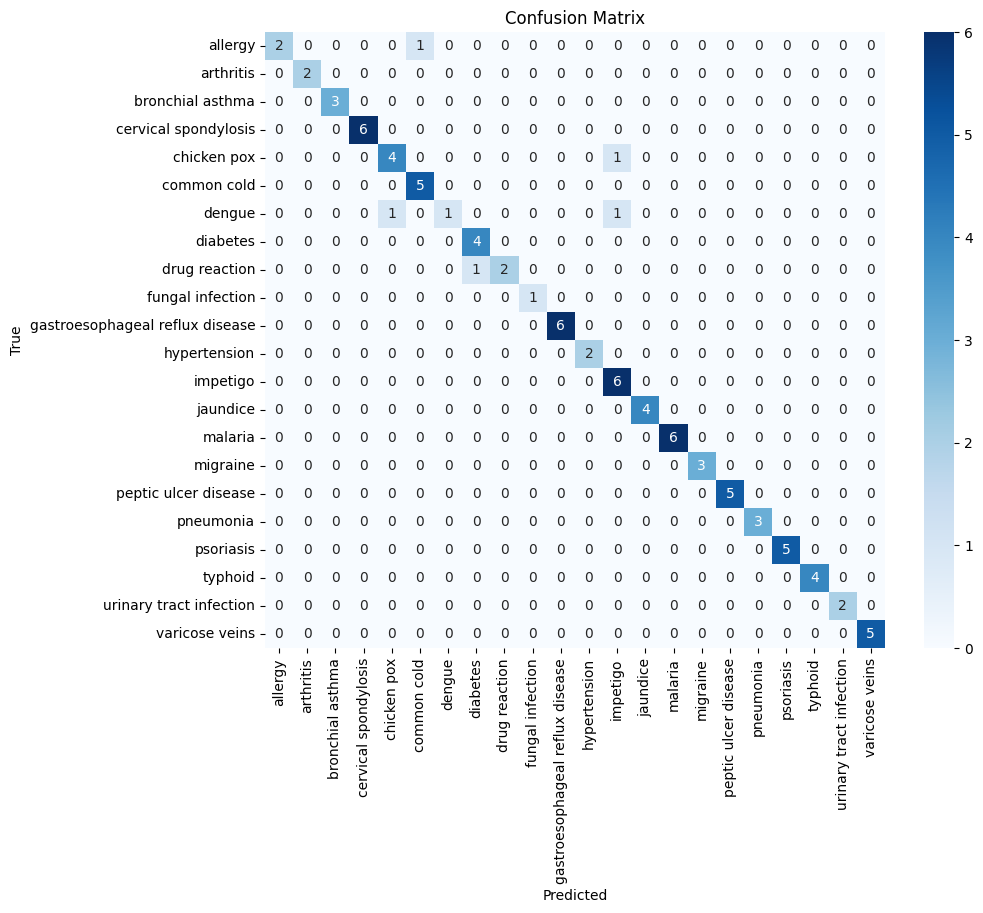

In [ ]:
# After evaluation
outputs = trainer.predict(val_ds)
preds = tokenizer.batch_decode(outputs.predictions, skip_special_tokens=True)
labels = tokenizer.batch_decode(outputs.label_ids, skip_special_tokens=True)

preds = [p.strip() for p in preds]
labels = [l.strip() for l in labels]

plot_confusion_matrix(preds, labels)

In [ ]:
import pandas as pd

def accuracy_per_class(preds, labels):
    data = pd.DataFrame({'label': labels, 'pred': preds})
    class_acc = data.groupby('label').apply(lambda x: (x['label'] == x['pred']).mean())
    class_acc = class_acc.reset_index()
    class_acc.columns = ['Class', 'Accuracy']
    display(class_acc)


In [ ]:
accuracy_per_class(preds, labels)

C:\Users\ARSENIY_\AppData\Local\Temp\ipykernel_11860\1018191576.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  class_acc = data.groupby('label').apply(lambda x: (x['label'] == x['pred']).mean())


,Class,Accuracy
0,allergy,0.666667
1,arthritis,1.000000
2,bronchial asthma,1.000000
3,cervical spondylosis,1.000000
4,chicken pox,0.800000
5,common cold,1.000000
6,dengue,0.333333
7,diabetes,1.000000
8,drug reaction,0.666667
9,fungal infection,1.000000
